In [1]:
!pip install opencv-python numpy matplotlib


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cach


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!python.exe -m pip install --upgrade pip


  Using cached pip-25.0-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [29]:
# Step 1: Load your input image
image = cv2.imread("Images/car.jpg")  # Replace with the path of your image
height, width = image.shape[:2]

In [30]:
# Step 2: Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outputs = net.forward(output_layers)

In [31]:
# Step 3: Process outputs and draw bounding boxes on the image
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Confidence threshold
            # Get bounding box coordinates
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Draw rectangle and label
            cv2.rectangle(image, (center_x - w // 2, center_y - h // 2), (center_x + w // 2, center_y + h // 2), (0, 255, 0), 2)
            cv2.putText(image, classes[class_id], (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


In [32]:
!pip install --upgrade matplotlib

In [33]:
import matplotlib.pyplot as plt

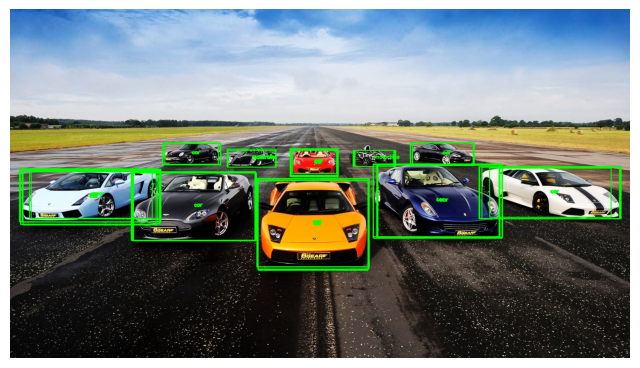

In [34]:
import matplotlib.pyplot as plt

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()
